## data preprocessing
#### in this notebook, We will clean and prep our data so that in subsequent notebooks we will create and train machine learning and deep learning models that are able to understand Arabic scripts to classify customer reviews of products.

In [ ]:
# install needed modules
! pip install tashaphyne

In [ ]:
# import modules
import matplotlib.pyplot as plt
import seaborn as sn
import os
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from tashaphyne.stemming import ArabicLightStemmer

In [ ]:
# read data from csv file
data = pd.read_csv('/content/drive/MyDrive/classification_reviews/data/ar_reviews_100k.tsv',sep='\t')

In [ ]:
# show the first 20 line
data.head(20)

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
5,Positive,أسلوب الكاتب رائع جدا و عميق جدا، قرأته عدة مر...
6,Positive,استثنائي. الهدوء في الجناح مع مسبح. عدم وجود ع...
7,Positive,الكتاب هو السيرة الذاتية للحداثة في المملكة بل...
8,Positive,من أجمل ما قرأت.. رواية تستحق القراءة فعلا..
9,Positive,بشكل عام جيده .. . التجاوب جيد جدا من قبل موظف...


### We want to categorize the comments into positive and negative only so we will delete the neutral (mixed) values ​​from the dataset.

In [ ]:
# remove mixed values from dataset
data = data[data['label'] != 'Mixed']
data.reset_index(drop=True, inplace=True)

In [ ]:
# calculate null values in each column
data.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
# drop null values
data.dropna(inplace=True)

In [ ]:
# calculate null values in each column
data.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
# calculate number of positive and negative reviews
data['label'].value_counts()

Positive    33333
Negative    33333
Name: label, dtype: int64

In [ ]:
# create function to calculate the length for each review
def compte_mots(phrase):
    return len(phrase.split())

# create new feature after apply function on dataset
data["len_sentences"] = data["text"].apply(compte_mots)

In [ ]:
# show the maximum review length
print("maximum length for sentence is: {}".format(max(data.len_sentences)))

maximum length for sentence is: 1622


In [ ]:
# Create a function for preprocessing Arabic text
def preprocessing(x):

    # Remove mentions (usernames) from the text
    x = re.sub('@[^\s]+', ' ', x)

    # Remove URLs and links from the text
    x = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', x)

    # Define a pattern to match emojis and emoticons
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # Chinese characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030""]+", flags=re.UNICODE)
    # Remove emojis and emoticons from the text
    x = emoji_pattern.sub(r'', x)

    # Define Arabic and English punctuation marks
    ar_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ#'''
    en_punctuations = string.punctuation

    # Combine Arabic and English punctuation marks
    punctuations = ar_punctuations + en_punctuations

    # Remove punctuations from the text
    x = x.translate(str.maketrans('', '', punctuations))

    # Define a pattern to match Arabic diacritics
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    # Remove Arabic diacritics from the text
    x = re.sub(arabic_diacritics, '', str(x))

    # Return the preprocessed text
    return x


In [ ]:
# apply preprocessing function on reviews
data["cleaned_text"] = data["text"].apply(lambda x: preprocessing(x))

In [ ]:
# show the first 30 rows
data.head(30)

,label,text,len_sentences,cleaned_text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,9,ممتاز نوعا ما النظافة والموقع والتجهيز والشاط...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,53,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,48,هادفة وقوية تنقلك من صخب شوارع القاهرة الى هد...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,107,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,15,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...
5,Positive,أسلوب الكاتب رائع جدا و عميق جدا، قرأته عدة مر...,17,أسلوب الكاتب رائع جدا و عميق جدا قرأته عدة مرا...
6,Positive,استثنائي. الهدوء في الجناح مع مسبح. عدم وجود ع...,13,استثنائي الهدوء في الجناح مع مسبح عدم وجود عاز...
7,Positive,الكتاب هو السيرة الذاتية للحداثة في المملكة بل...,26,الكتاب هو السيرة الذاتية للحداثة في المملكة بل...
8,Positive,من أجمل ما قرأت.. رواية تستحق القراءة فعلا..,8,من أجمل ما قرأت رواية تستحق القراءة فعلا
9,Positive,بشكل عام جيده .. . التجاوب جيد جدا من قبل موظف...,23,بشكل عام جيده التجاوب جيد جدا من قبل موظفي ا...


In [ ]:
# drop columns that we dont need
data.drop('len_sentences', axis=1, inplace=True)
data.drop('text', axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

# show the first 20 rows
data.head(20)

,label,cleaned_text
0,Positive,ممتاز نوعا ما النظافة والموقع والتجهيز والشاط...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة وقوية تنقلك من صخب شوارع القاهرة الى هد...
3,Positive,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...
5,Positive,أسلوب الكاتب رائع جدا و عميق جدا قرأته عدة مرا...
6,Positive,استثنائي الهدوء في الجناح مع مسبح عدم وجود عاز...
7,Positive,الكتاب هو السيرة الذاتية للحداثة في المملكة بل...
8,Positive,من أجمل ما قرأت رواية تستحق القراءة فعلا
9,Positive,بشكل عام جيده التجاوب جيد جدا من قبل موظفي ا...


In [ ]:
# convert positive and negative to numerical
data['label'] = data['label'].map({'Positive': 1, 'Negative': -1})
unique_values = data['label'].unique()
print(unique_values)

[ 1 -1]


In [ ]:
# Download Arabic stopwords if not already downloaded
nltk.download('stopwords')

# Create a set of Arabic stopwords
stop_words = set(stopwords.words('arabic'))

# Create an Arabic stemmer
stemmer = ArabicLightStemmer()

# Define a function to preprocess text
def preprocess_text2(text):
    # Remove digits from the text
    text = re.sub(r'\d+', '', text)

    # Remove non-alphanumeric characters from the text
    text = re.sub(r'[^\w\s]', '', text)

    # Split the text into words
    words = text.split()

    # Apply stemming to each word and remove stopwords
    words = [stemmer.light_stem(word) for word in words if word not in stop_words]

    # Join the preprocessed words back into a text
    return ' '.join(words)

# Apply the preprocessing function to the 'cleaned_text' column in 'data' DataFrame
data['cleaned_text'] = data['cleaned_text'].apply(preprocess_text2)

# Display the first 20 rows of the preprocessed data
data.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,cleaned_text
0,1,ممتاز وعا نظاف موقع تجهيز شاطيء مطعم
1,1,سباب جاح إمار شخص دول يعشق راب حب إمار مض كر ن...
2,1,هادف قو نقل صخب شوارع قاهر لى هدوء جبال شيش تع...
3,1,خلص مبدئي لي مس بهار زي فيل ازرق ميقراش حس حمد...
4,1,ياس جلوري جزء تجزأ دب دق متكامل خدم مريح فسيا وجد
5,1,سلوب كاتب رائع جد عميق جد قرأ عد مر نت طالب مر...
6,1,استثنائ هدوء جناح مسبح عدم جود عازل جيد غرف عاديه
7,1,كتاب سير ذات حداث مملك لسان رز معاصر حليل جتما...
8,1,جمل قرأ روا ستحق قراء عل
9,1,شكل عام جيد تجاوب جيد جد موظف استقبال خدم توصي...


In [ ]:
# schuffle dataset
data = data.sample(frac=1, random_state=42)

In [ ]:
# show the first 20 rows
data.head(20)

,label,cleaned_text
65005,-1,حب تر تان قرأ كتب منتشر لي ناس تتكلم عن قصد عد...
6736,1,حمل قع
63032,-1,كتاب صغح تلخص كل دا صفح كرار طريق ظيع درج ني ق...
2990,1,استثنائ جميل جد موقع استراتيجي
50213,-1,موحش رهيب مليء حشر ذهب مرة خرى قع فندق جوار طي...
30288,1,نهي تو هو قاتل مي معلوف كتاب جيد جد لكن حب نظر...
6650,1,جميل شيء
6016,1,استثنائ موقع
7515,1,تاب قرأ غاز قصيب وقف عند معقد قصوص تب على قصوص...
19413,1,بدو هاروكى مبيعرفش كتب روا حط تاتش فانتازي تاع...


In [ ]:
# convert dataset after prprocessing to csv new csv file
data.to_csv('/content/drive/MyDrive/classification_reviews/data/amazon_cleaned.csv')

## data visualization
We will read the dataset and display the percentage of positive comments and the percentage of negative comments in it. This will help us to know whether the data is balanced or not before we start building models.

In [ ]:
# raad dataset after preprocessing
data = pd.read_csv('/content/drive/MyDrive/classification_reviews/data/amazon_cleaned.csv')
data.head(10)

,Unnamed: 0,label,cleaned_text
0,65005,-1,حب تر تان قرأ كتب منتشر لي ناس تتكلم عن قصد عد...
1,6736,1,حمل قع
2,63032,-1,كتاب صغح تلخص كل دا صفح كرار طريق ظيع درج ني ق...
3,2990,1,استثنائ جميل جد موقع استراتيجي
4,50213,-1,موحش رهيب مليء حشر ذهب مرة خرى قع فندق جوار طي...
5,30288,1,نهي تو هو قاتل مي معلوف كتاب جيد جد لكن حب نظر...
6,6650,1,جميل شيء
7,6016,1,استثنائ موقع
8,7515,1,تاب قرأ غاز قصيب وقف عند معقد قصوص تب على قصوص...
9,19413,1,بدو هاروكى مبيعرفش كتب روا حط تاتش فانتازي تاع...


In [ ]:
# drop column
data.drop('Unnamed: 0', axis=1, inplace=True)

# if data contain null values please fill it
data = data.fillna('')
data.reset_index(drop=True, inplace=True)

# show the first 10 rows
data.head(10)

,label,cleaned_text
0,-1,حب تر تان قرأ كتب منتشر لي ناس تتكلم عن قصد عد...
1,1,حمل قع
2,-1,كتاب صغح تلخص كل دا صفح كرار طريق ظيع درج ني ق...
3,1,استثنائ جميل جد موقع استراتيجي
4,-1,موحش رهيب مليء حشر ذهب مرة خرى قع فندق جوار طي...
5,1,نهي تو هو قاتل مي معلوف كتاب جيد جد لكن حب نظر...
6,1,جميل شيء
7,1,استثنائ موقع
8,1,تاب قرأ غاز قصيب وقف عند معقد قصوص تب على قصوص...
9,1,بدو هاروكى مبيعرفش كتب روا حط تاتش فانتازي تاع...


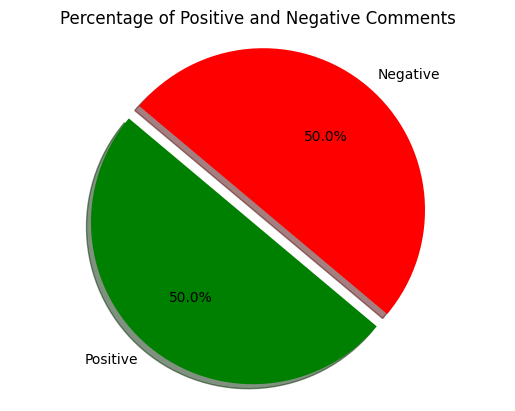

In [ ]:
# Analyze data
positive_comments = data[data['label'] == 1]
negative_comments = data[data['label'] == -1]

# Calculate percentage of positive and negative comments
total_comments = len(data)
positive_percentage = len(positive_comments) / total_comments * 100
negative_percentage = len(negative_comments) / total_comments * 100

# Create a pie chart
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['green', 'red']
explode = (0.1, 0)  # explode the 1st slice (Positive)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Positive and Negative Comments')
plt.show()
